## Машинное обучение. 2 семестр

Классическое машинное обучение

Курсовая работа

Прогноз эффективности сочетания параметров для создания лекарственных препаратов на основе данных датасета с показателями целевых переменных:

1. IC₅₀ (Inhibitory Concentration 50) — концентрация вещества, при которой оно ингибирует 50% активности определённого фермента или клеточного процесса, чем ниже значение IC₅₀, тем сильнее вещество.

2. CC₅₀ (Cytotoxic Concentration 50) — концентрация вещества, при которой 50% клеток погибает или теряет жизнеспособность, чем выше CC₅₀, тем менее токсичным является вещество.

3. SI (Selectivity Index — Индекс селективности) — отношение токсической дозы (CC₅₀) к лечебной дозе (IC₅₀). Показывает, насколько вещество селективно действует — то есть, насколько хорошо оно подавляет целевой эффект, не повреждая клетки.

##  Анализ данных, EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install seaborn matplotlib

In [ ]:
pip show seaborn matplotlib

Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /usr/local/lib/python3.11/dist-packages
Requires: matplotlib, numpy, pandas
Required-by: dtale, missingno
---
Name: matplotlib
Version: 3.10.0
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: Unknown <matplotlib-users@python.org>
License: License agreement for matplotlib versions 1.3.0 and later

 1. This LICENSE AGREEMENT is between the Matplotlib Development Team
 ("MDT"), and the Individual or Organization ("Licensee") accessing and
 otherwise using matplotlib software in source or binary form and its
 associated documentation.

 2. Subject to the terms and conditions of this License Agreement, MDT
 hereby grants Licensee a nonexclusive, royalty-free, world-wide license
 to reproduce, analyze, test, perform and/or display publicly, prepare
 derivative 

In [ ]:
pip install dtale

In [ ]:
import numpy as np
import pandas as pd
import dtale
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from scipy.stats import mannwhitneyu
from sklearn.preprocessing import StandardScaler
from scipy.stats import probplot, shapiro, anderson

In [ ]:
# Загрузка  данных
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Classic_ML_Vo_PJ/Data_course_Classic_ML.xlsx', index_col=0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 1000
Columns: 213 entries, IC50, mM to fr_urea
dtypes: float64(107), int64(106)
memory usage: 1.6 MB


In [ ]:
# Выведим первые строки тренировочного датафрейма
data.head(10)

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,...,0,0,0,0,0,0,0,0,3,0
1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,...,0,0,0,0,0,0,0,0,3,0
2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,446.808,...,0,0,0,0,0,0,0,0,3,0
3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,398.679,...,0,0,0,0,0,0,0,0,4,0
4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,466.713,...,0,0,0,0,0,0,0,0,0,0
5,15.037911,30.075821,2.000000,5.758408,5.758408,0.278083,0.278083,0.711012,28.600000,332.491,...,0,0,0,0,0,0,0,0,0,0
6,18.908167,14.559288,0.770000,2.584472,2.584472,0.429649,0.429649,0.328539,36.564103,528.869,...,0,0,0,0,0,0,0,0,0,0
7,28.773087,23.593931,0.820000,13.821880,13.821880,0.079845,-0.301260,0.217332,31.333333,695.089,...,0,0,0,0,0,0,0,0,4,0
8,50.057068,153.709268,3.070681,14.171614,14.171614,0.019123,-0.411828,0.187781,29.157895,763.123,...,0,0,0,0,0,0,0,0,0,0
9,6.400847,400.906360,62.633333,6.135893,6.135893,0.239226,0.239226,0.439915,36.400000,468.685,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Проверяем размерность датафрейма
data.shape

(1001, 213)

In [ ]:
# Проверка типов данных
data.dtypes

,0
"IC50, mM",float64
"CC50, mM",float64
SI,float64
MaxAbsEStateIndex,float64
MaxEStateIndex,float64
...,...
fr_thiazole,int64
fr_thiocyan,int64
fr_thiophene,int64
fr_unbrch_alkane,int64


In [ ]:
# Исследуем наличие дубликатов
dub = data.duplicated().sum()
print(dub)
# Если есть, удаляем
data = data.drop_duplicates()
data.shape

32


(969, 213)

In [ ]:
# Найдем все не числовые столбцы в датафрейме
non_numeric_cols = data.select_dtypes(exclude=['float64', 'int64']).columns
print("Не числовые столбцы:", non_numeric_cols)

Не числовые столбцы: Index([], dtype='object')


In [ ]:
# Обзор всех типов столбцов датафрейма
data.describe(include='all')

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,...,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.0,969.000000,969.000000,969.000000
mean,220.726223,586.419908,73.967907,10.893712,10.893712,0.179533,-0.960140,0.577633,29.370350,351.486139,...,0.055728,0.012384,0.009288,0.001032,0.001032,0.053664,0.0,0.070175,0.208462,0.007224
std,397.172441,633.624464,695.564665,3.284005,3.284005,0.168928,1.567568,0.213316,12.605779,127.388186,...,0.263069,0.110649,0.095975,0.032125,0.032125,0.225469,0.0,0.255574,1.231428,0.084730
min,0.003517,0.700808,0.011489,2.321942,2.321942,0.000039,-6.992796,0.059567,9.416667,110.156000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,12.515396,99.999345,1.488095,10.006389,10.006389,0.050979,-1.333174,0.442842,18.500000,266.252000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,45.338355,424.166213,3.900000,12.196496,12.196496,0.123850,-0.419485,0.634372,29.200000,318.373000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,231.373089,891.776925,16.375000,13.178870,13.178870,0.291020,0.007873,0.742483,38.600000,413.670000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,4128.529377,4538.976189,15620.600000,15.933463,15.933463,1.374614,1.374614,0.947265,60.272727,904.777000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,20.000000,1.000000


In [ ]:
# Выводим базовую статистику по числовым признакам
data.describe()

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,...,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.0,969.000000,969.000000,969.000000
mean,220.726223,586.419908,73.967907,10.893712,10.893712,0.179533,-0.960140,0.577633,29.370350,351.486139,...,0.055728,0.012384,0.009288,0.001032,0.001032,0.053664,0.0,0.070175,0.208462,0.007224
std,397.172441,633.624464,695.564665,3.284005,3.284005,0.168928,1.567568,0.213316,12.605779,127.388186,...,0.263069,0.110649,0.095975,0.032125,0.032125,0.225469,0.0,0.255574,1.231428,0.084730
min,0.003517,0.700808,0.011489,2.321942,2.321942,0.000039,-6.992796,0.059567,9.416667,110.156000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,12.515396,99.999345,1.488095,10.006389,10.006389,0.050979,-1.333174,0.442842,18.500000,266.252000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,45.338355,424.166213,3.900000,12.196496,12.196496,0.123850,-0.419485,0.634372,29.200000,318.373000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,231.373089,891.776925,16.375000,13.178870,13.178870,0.291020,0.007873,0.742483,38.600000,413.670000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,4128.529377,4538.976189,15620.600000,15.933463,15.933463,1.374614,1.374614,0.947265,60.272727,904.777000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,20.000000,1.000000


In [ ]:
# Удалим лишние обозначения (", mM") из названий столбцов для упрощения работы с данными
data = data.rename(columns={
    'IC50, mM': 'IC50',
    'CC50, mM': 'CC50'
})

In [ ]:
# Проверка размерности
data.shape

(969, 213)

In [ ]:
# Cписок всех названий столбцов датафрейма
print("Все названия колонок:")
for col in data.columns:
    print(col)

Все названия колонок:
IC50
CC50
SI
MaxAbsEStateIndex
MaxEStateIndex
MinAbsEStateIndex
MinEStateIndex
qed
SPS
MolWt
HeavyAtomMolWt
ExactMolWt
NumValenceElectrons
NumRadicalElectrons
MaxPartialCharge
MinPartialCharge
MaxAbsPartialCharge
MinAbsPartialCharge
FpDensityMorgan1
FpDensityMorgan2
FpDensityMorgan3
BCUT2D_MWHI
BCUT2D_MWLOW
BCUT2D_CHGHI
BCUT2D_CHGLO
BCUT2D_LOGPHI
BCUT2D_LOGPLOW
BCUT2D_MRHI
BCUT2D_MRLOW
AvgIpc
BalabanJ
BertzCT
Chi0
Chi0n
Chi0v
Chi1
Chi1n
Chi1v
Chi2n
Chi2v
Chi3n
Chi3v
Chi4n
Chi4v
HallKierAlpha
Ipc
Kappa1
Kappa2
Kappa3
LabuteASA
PEOE_VSA1
PEOE_VSA10
PEOE_VSA11
PEOE_VSA12
PEOE_VSA13
PEOE_VSA14
PEOE_VSA2
PEOE_VSA3
PEOE_VSA4
PEOE_VSA5
PEOE_VSA6
PEOE_VSA7
PEOE_VSA8
PEOE_VSA9
SMR_VSA1
SMR_VSA10
SMR_VSA2
SMR_VSA3
SMR_VSA4
SMR_VSA5
SMR_VSA6
SMR_VSA7
SMR_VSA8
SMR_VSA9
SlogP_VSA1
SlogP_VSA10
SlogP_VSA11
SlogP_VSA12
SlogP_VSA2
SlogP_VSA3
SlogP_VSA4
SlogP_VSA5
SlogP_VSA6
SlogP_VSA7
SlogP_VSA8
SlogP_VSA9
TPSA
EState_VSA1
EState_VSA10
EState_VSA11
EState_VSA2
EState_VSA3
EState_V

In [ ]:
# Проанализируем структуру данных, разделим на числовые и категориальные колонки
print(data.dtypes)

# Выведим колонки с категориальным типом
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nКатегориальные колонки:")
print(categorical_columns)

# Выведим колонки с числовым типом
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
print("\nЧисловые колонки:")
print(numerical_columns)

IC50                 float64
CC50                 float64
SI                   float64
MaxAbsEStateIndex    float64
MaxEStateIndex       float64
                      ...   
fr_thiazole            int64
fr_thiocyan            int64
fr_thiophene           int64
fr_unbrch_alkane       int64
fr_urea                int64
Length: 213, dtype: object

Категориальные колонки:
[]

Числовые колонки:
['IC50', 'CC50', 'SI', 'MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 

In [ ]:
# Анализируем числовые столбцы , находим все которые полностью заполнены нулями
def get_numeric_col_stats(col):
    return {
        'total_count': len(col),                # Общее количество строк в столбце
        'zero_count': (col == 0).sum(),          # Количество нулевых значений
        'nan_count': col.isna().sum(),           # Количество пропущенных значений
        'dtype': str(col.dtype),                 # Тип данных столбца
        'mean': col.mean(),                      # Среднее значение
        'std': col.std(),                        # Стандартное отклонение
        'min': col.min(),                        # Минимальное значение
        'max': col.max(),                        # Максимальное значение
        'median': col.median()                   # Медиана
    }

def get_zero_columns_info(df):
    zero_cols_info = {}                         # Словарь для хранения информации о нулевых столбцах

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):  # Проверяем, является ли столбец числовым
            # Проверка: все значения равны 0 или NaN
            if (df[col].fillna(0) == 0).all():
                stats = get_numeric_col_stats(df[col])  # Получаем статистику по столбцу
                stats['name'] = col                     # Добавляем имя столбца
                stats['all_zero'] = True                # Помечаем, что столбец полностью состоит из нулей
                zero_cols_info[col] = stats             # Сохраняем в словарь

    return zero_cols_info

if __name__ == '__main__':
    zero_cols_info = get_zero_columns_info(data)

    # Выведим результаты
    print("Нулевые столбцы:")
    for name, info in zero_cols_info.items():
        print(f"\nСтолбец '{name}':")
        for k, v in info.items():
            print(f"  {k}: {v}")

Нулевые столбцы:

Столбец 'NumRadicalElectrons':
  total_count: 969
  zero_count: 969
  nan_count: 0
  dtype: int64
  mean: 0.0
  std: 0.0
  min: 0
  max: 0
  median: 0.0
  name: NumRadicalElectrons
  all_zero: True

Столбец 'SMR_VSA8':
  total_count: 969
  zero_count: 969
  nan_count: 0
  dtype: int64
  mean: 0.0
  std: 0.0
  min: 0
  max: 0
  median: 0.0
  name: SMR_VSA8
  all_zero: True

Столбец 'SlogP_VSA9':
  total_count: 969
  zero_count: 969
  nan_count: 0
  dtype: int64
  mean: 0.0
  std: 0.0
  min: 0
  max: 0
  median: 0.0
  name: SlogP_VSA9
  all_zero: True

Столбец 'fr_N_O':
  total_count: 969
  zero_count: 969
  nan_count: 0
  dtype: int64
  mean: 0.0
  std: 0.0
  min: 0
  max: 0
  median: 0.0
  name: fr_N_O
  all_zero: True

Столбец 'fr_SH':
  total_count: 969
  zero_count: 969
  nan_count: 0
  dtype: int64
  mean: 0.0
  std: 0.0
  min: 0
  max: 0
  median: 0.0
  name: fr_SH
  all_zero: True

Столбец 'fr_azide':
  total_count: 969
  zero_count: 969
  nan_count: 0
  dtype: 

In [ ]:
# Удаление нерелевантных столбцов, несущих нуловую информацию, чтобы улучшить качество данных
# Удаляем столбцы, которые полностью состоят из нулей (или NaN, заменённых на 0)
df = data.drop(columns=list(zero_cols_info.keys()))

# Выведим первые 5 строк очищенного датафрейма для проверки результата
print("\nОчищенный датафрейм (5 строк):")
print(df.head())


Очищенный датафрейм (5 строк):
         IC50        CC50         SI  MaxAbsEStateIndex  MaxEStateIndex  \
0    6.239374  175.482382  28.125000           5.094096        5.094096   
1    0.771831    5.402819   7.000000           3.961417        3.961417   
2  223.808778  161.142320   0.720000           2.627117        2.627117   
3    1.705624  107.855654  63.235294           5.097360        5.097360   
4  107.131532  139.270991   1.300000           5.150510        5.150510   

   MinAbsEStateIndex  MinEStateIndex       qed        SPS    MolWt  ...  \
0           0.387225        0.387225  0.417362  42.928571  384.652  ...   
1           0.533868        0.533868  0.462473  45.214286  388.684  ...   
2           0.543231        0.543231  0.260923  42.187500  446.808  ...   
3           0.390603        0.390603  0.377846  41.862069  398.679  ...   
4           0.270476        0.270476  0.429038  36.514286  466.713  ...   

   fr_quatN  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetyle

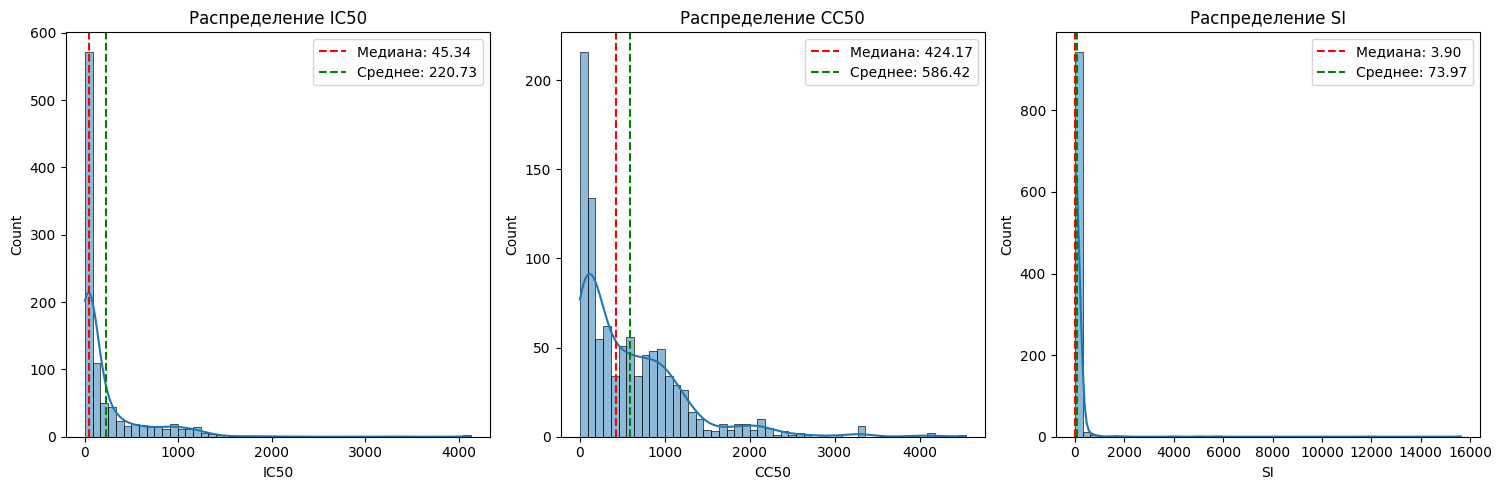

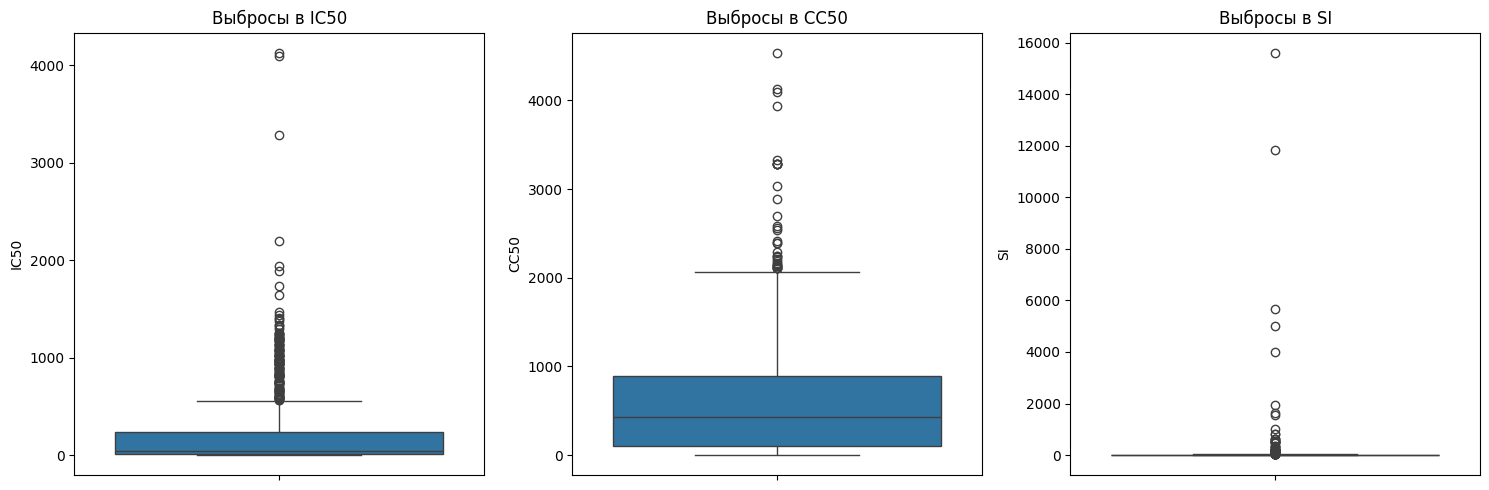


Численный анализ целевых переменных:

Столбец: IC50
  Среднее: 220.73
  Медиана: 45.34
  IQR (размах межквартильного диапазона): 218.86
  Количество выбросов (ниже Q1 - 1.5IQR): 0
  Количество выбросов (выше Q3 + 1.5IQR): 138

Столбец: CC50
  Среднее: 586.42
  Медиана: 424.17
  IQR (размах межквартильного диапазона): 791.78
  Количество выбросов (ниже Q1 - 1.5IQR): 0
  Количество выбросов (выше Q3 + 1.5IQR): 35

Столбец: SI
  Среднее: 73.97
  Медиана: 3.90
  IQR (размах межквартильного диапазона): 14.89
  Количество выбросов (ниже Q1 - 1.5IQR): 0
  Количество выбросов (выше Q3 + 1.5IQR): 120


In [ ]:
def plot_histograms(df, cols):
    """Функция гистограммы с KDE для указанных числовых столбцов,
       отмечая медиану и среднее значение."""

    plt.figure(figsize=(15, 5))

    for i, col in enumerate(cols, 1):
        plt.subplot(1, len(cols), i)
        sns.histplot(df[col], kde=True, bins=50)
        plt.title(f'Распределение {col}')

        # Отмечаем медиану и среднее на графике
        median = df[col].median()
        mean = df[col].mean()
        plt.axvline(median, color='red', linestyle='--', label=f'Медиана: {median:.2f}')
        plt.axvline(mean, color='green', linestyle='--', label=f'Среднее: {mean:.2f}')
        plt.legend()

    plt.tight_layout()
    plt.show()


def plot_boxplots(df, cols):
    """Функция boxplot (ящики с усами) для выявления выбросов в указанных столбцах."""

    plt.figure(figsize=(15, 5))

    for i, col in enumerate(cols, 1):
        plt.subplot(1, len(cols), i)
        sns.boxplot(y=df[col])
        plt.title(f'Выбросы в {col}')

    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    # Выбираем целевые колонки для визуализации
    target_columns = ['IC50', 'CC50', 'SI']

    # Визуализация распределений данных
    plot_histograms(df, target_columns)  # Гистограммы с KDE, медианой и средним

    # Визуализация наличия выбросов
    plot_boxplots(df, target_columns)    # Boxplot для анализа аномалий

    # Численный вывод характеристик для каждого признака
    print("\nЧисленный анализ целевых переменных:")
    for col in target_columns:
        mean = df[col].mean()
        median = df[col].median()
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        outliers_low = df[df[col] < (q1 - 1.5 * iqr)].shape[0]
        outliers_high = df[df[col] > (q3 + 1.5 * iqr)].shape[0]

        print(f"\nСтолбец: {col}")
        print(f"  Среднее: {mean:.2f}")
        print(f"  Медиана: {median:.2f}")
        print(f"  IQR (размах межквартильного диапазона): {iqr:.2f}")
        print(f"  Количество выбросов (ниже Q1 - 1.5IQR): {outliers_low}")
        print(f"  Количество выбросов (выше Q3 + 1.5IQR): {outliers_high}")

Вывод:

IC50, CC50 и SI характеризуются правосторонней асимметрией распределений с наличием экстремальных значений, особенно выраженных в случае SI. Это подтверждается тем, что медиана меньше среднего значения во всех случаях, что указывает на влияние длинных правых хвостов.

Таким образом, данные особенности будем интерпретировать как важные характеристики целевых переменных , которые могут оказывать существенное влияние на моделирование и прогнозирование.  

In [ ]:
# Проверяем наличие пропущенных значений в выбранных целевых переменных
target_columns = ["IC50", "CC50", "SI"]
print(df[target_columns].isnull().sum())

IC50    0
CC50    0
SI      0
dtype: int64


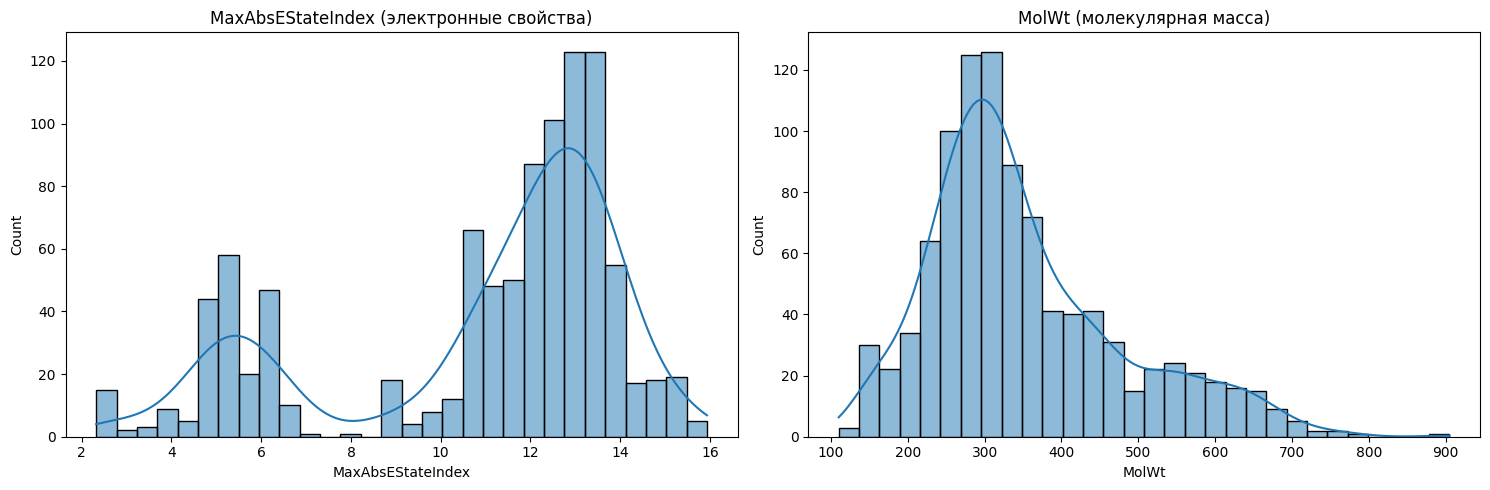


Численный анализ свойств молекул:

Свойство: MaxAbsEStateIndex
  Среднее значение: 10.89
  Медиана: 12.20
  Стандартное отклонение: 3.28
  Минимальное значение: 2.32
  Максимальное значение: 15.93

Свойство: MolWt
  Среднее значение: 351.49
  Медиана: 318.37
  Стандартное отклонение: 127.39
  Минимальное значение: 110.16
  Максимальное значение: 904.78


In [ ]:
def plot_property_histogram(df, property_name, title, position):
    """ Функция для гистограммы с KDE для заданного свойства молекул. """
    plt.subplot(1, 2, position)  # Размещаем график на позиции position (в сетке 1 строка x 2 столбца)
    sns.histplot(df[property_name], kde=True, bins=30)  # Гистограмма + кривая KDE
    plt.title(title)  # Устанавливаем заголовок


if __name__ == '__main__':

    plt.figure(figsize=(15, 5))

    # Визуализируем распределение свойства MaxAbsEStateIndex — электронное свойство молекулы
    plot_property_histogram(df, 'MaxAbsEStateIndex', 'MaxAbsEStateIndex (электронные свойства)', 1)

    # Визуализируем распределение молекулярной массы (MolWt)
    plot_property_histogram(df, 'MolWt', 'MolWt (молекулярная масса)', 2)

    # Автоматически корректируем расположение графиков, чтобы они не пересекались
    plt.tight_layout()
    plt.show()

    # Численный вывод характеристик для каждого признака
    print("\nЧисленный анализ свойств молекул:")
    for col in ['MaxAbsEStateIndex', 'MolWt']:
        mean = df[col].mean()
        median = df[col].median()
        std = df[col].std()
        min_val = df[col].min()
        max_val = df[col].max()

        print(f"\nСвойство: {col}")
        print(f"  Среднее значение: {mean:.2f}")
        print(f"  Медиана: {median:.2f}")
        print(f"  Стандартное отклонение: {std:.2f}")
        print(f"  Минимальное значение: {min_val:.2f}")
        print(f"  Максимальное значение: {max_val:.2f}")

Анализ свойств молекул:

1. MaxAbsEStateIndex (максимальное абсолютное значение электрохимического состояния)

Среднее = 10.89

Медиана = 12.20

Умеренная левосторонняя асимметрия, низкая вариативность. Показатель стабильный, данные однородны, с хорошей концентрацией значений около медианы. Свойства молекул по этому признаку относительно однородны, без выраженных выбросов.

 2. MolWt (молекулярная масса)

Среднее = 351.49

Медиана = 318.37

Сильная правосторонняя асимметрия, высокая вариативность. Присутствуют молекулы с чрезвычайно высокой массой.

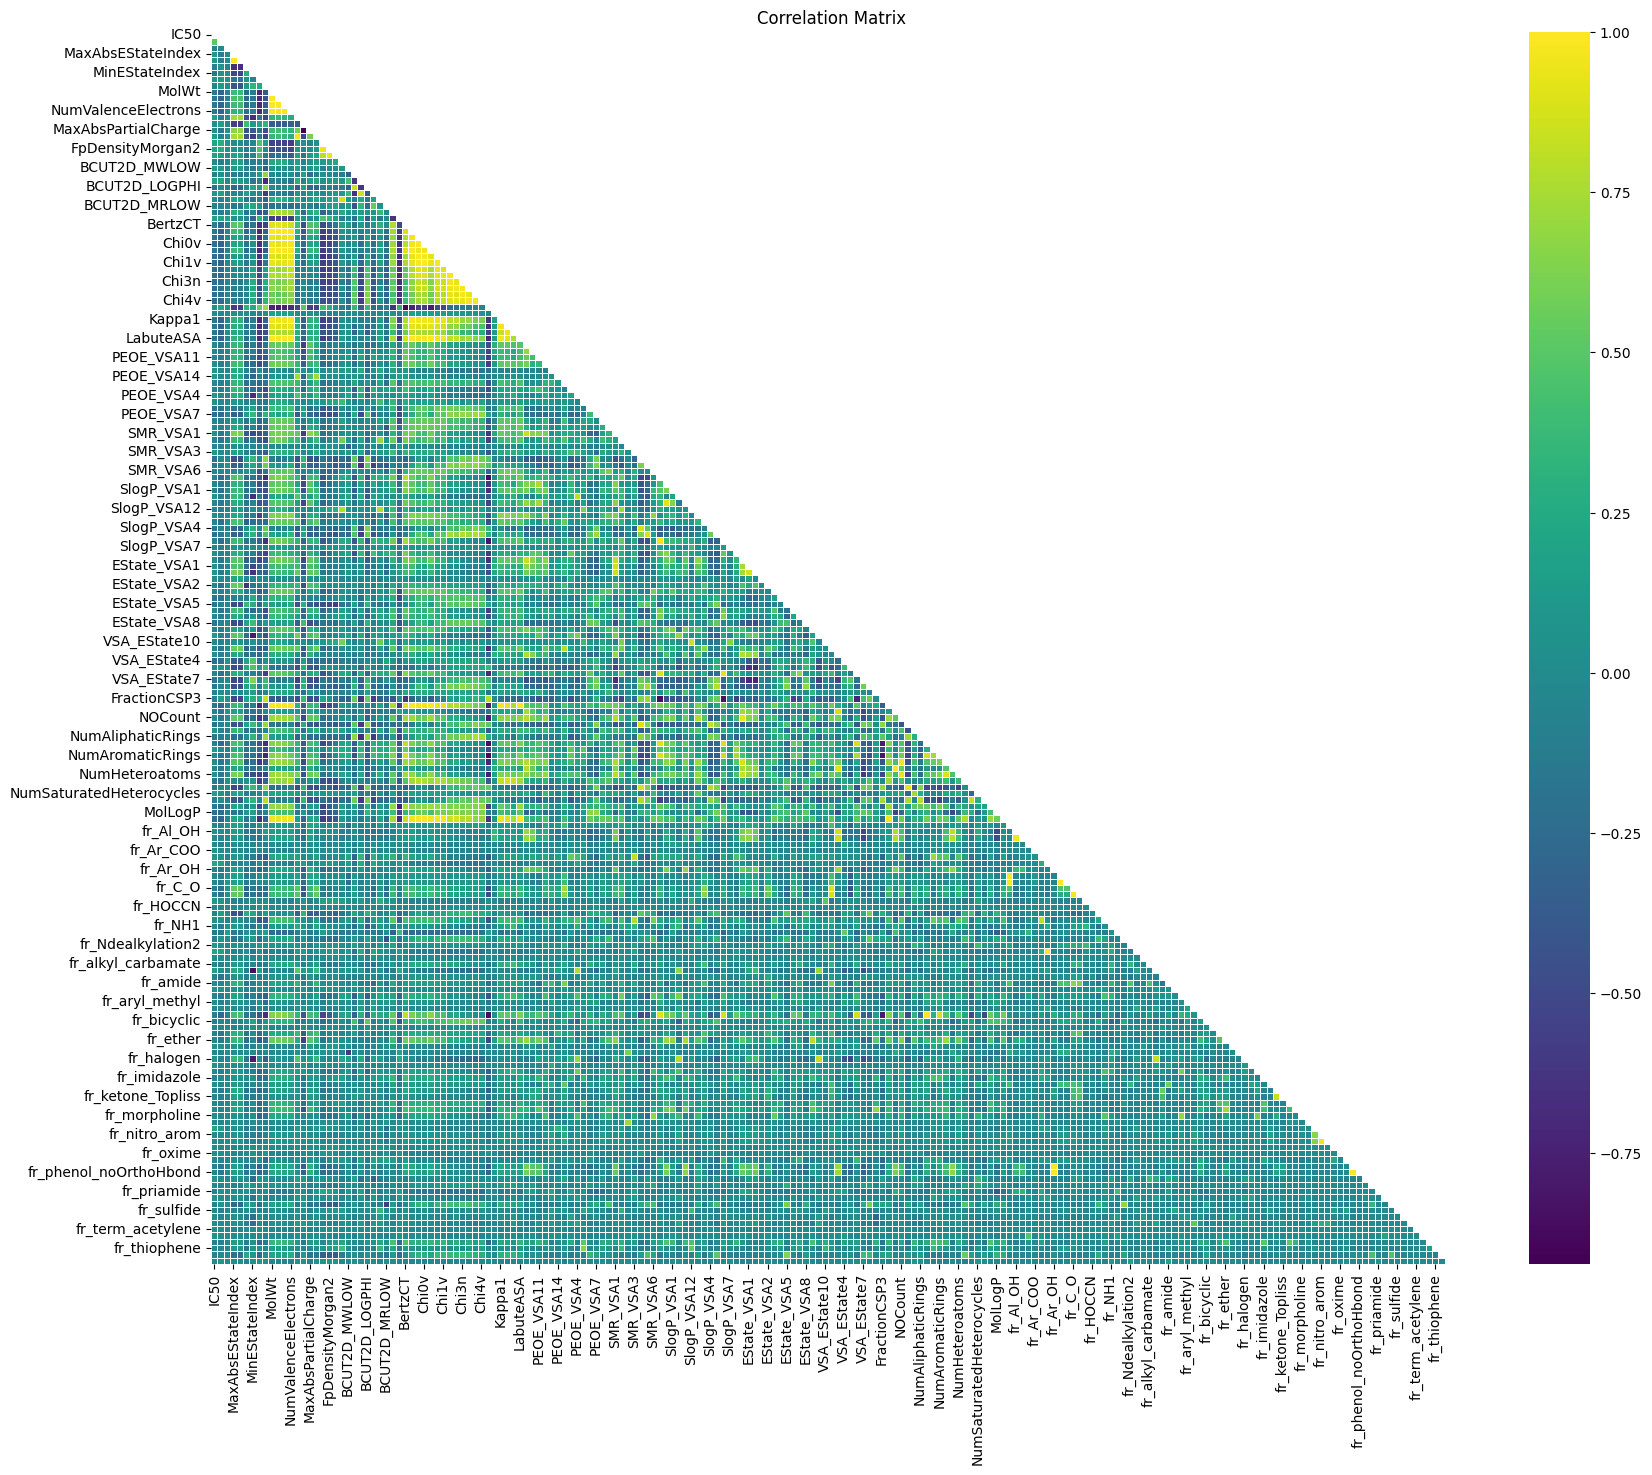

In [ ]:
# Построим тепловую карту корреляций между всеми числовыми признаками датафрейма
def plot_correlation_matrix(df, figsize=(20, 16), cmap='coolwarm', linewidths=0.5):
    """
    Построение матрицы корреляций для числовых столбцов DataFrame.

    Параметры:
        df (pd.DataFrame): Исходный датафрейм с данными.
        figsize (tuple): Размер графика (ширина, высота).
        cmap (str): Цветовая палитра для heatmap.
        linewidths (float): Толщина линий между ячейками.
    """
    # Выбираем только числовые колонки для расчёта корреляции
    corr_matrix = df.select_dtypes(include=[np.number]).corr()

    # Создаём новый график заданного размера
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix,
                 annot=False,
                 cmap='viridis',
                 linewidths=linewidths,
                 mask=np.triu(np.ones_like(corr_matrix, dtype=bool)))

    plt.title('Correlation Matrix')
    plt.show()

if __name__ == '__main__':
    plot_correlation_matrix(df)

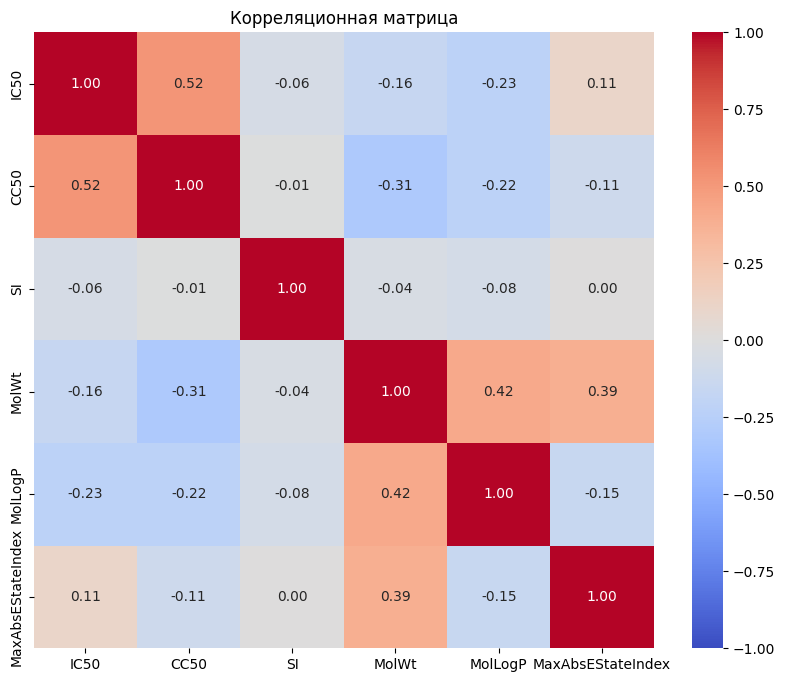


Все корреляции:
  IC50 & CC50: 0.52
  IC50 & SI: -0.06
  IC50 & MolWt: -0.16
  IC50 & MolLogP: -0.23
  IC50 & MaxAbsEStateIndex: 0.11
  CC50 & SI: -0.01
  CC50 & MolWt: -0.31
  CC50 & MolLogP: -0.22
  CC50 & MaxAbsEStateIndex: -0.11
  SI & MolWt: -0.04
  SI & MolLogP: -0.08
  SI & MaxAbsEStateIndex: 0.00
  MolWt & MolLogP: 0.42
  MolWt & MaxAbsEStateIndex: 0.39
  MolLogP & MaxAbsEStateIndex: -0.15

Сильные корреляции (>= 0.7 или <= -0.7):
  Нет сильных корреляций.


In [ ]:
# Построим тепловую карту корреляций между выбранными ключевыми признаками датафрейм
def plot_key_features_correlation_matrix(df, columns, figsize=(10, 8), cmap='coolwarm'):
    """
    Строит корреляционную матрицу для выбранных ключевых признаков и выводит список сильных корреляций.

    Параметры:
        df (pd.DataFrame): Исходный датафрейм с данными.
        columns (list of str): Список названий колонок, для которых будет построена матрица корреляций.
        figsize (tuple): Размер графика (ширина, высота).
        cmap (str): Цветовая палитра для heatmap.
    """

    # Вычисляем матрицу корреляций только для указанных колонок
    corr_matrix = df[columns].corr()

    # Создаем новую фигуру заданного размера
    plt.figure(figsize=figsize)

    # Отображаем матрицу корреляций в виде тепловой карты (heatmap)
    sns.heatmap(corr_matrix, annot=True, cmap=cmap, vmin=-1, vmax=1, fmt=".2f")

    # Устанавливаем заголовок графика
    plt.title('Корреляционная матрица')

    # Отображаем график
    plt.show()

    # Отладка: вывод всех корреляций
    print("\nВсе корреляции:")
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            col1 = columns[i]
            col2 = columns[j]
            corr = corr_matrix.loc[col1, col2]
            print(f"  {col1} & {col2}: {corr:.2f}")

    # Выводим текстовый список сильных корреляций (>= 0.7 или <= -0.7)
    print("\nСильные корреляции (>= 0.7 или <= -0.7):")
    found = False
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            col1 = columns[i]
            col2 = columns[j]
            corr = corr_matrix.loc[col1, col2]
            if abs(corr) >= 0.7:
                print(f"  {col1} & {col2}: {corr:.2f}")
                found = True
    if not found:
        print("  Нет сильных корреляций.")


if __name__ == '__main__':
    # Определяем список ключевых признаков, для которых будем строить корреляцию
    corr_columns = ['IC50', 'CC50', 'SI', 'MolWt', 'MolLogP', 'MaxAbsEStateIndex']

    # Вызываем функцию для построения корреляционной матрицы
    plot_key_features_correlation_matrix(df, corr_columns)

Выводы:

Анализ мультиколлинеарности показывает наличие сильных линейных зависимостей между некоторыми признаками, что может повлиять на качество и интерпретируемость моделей.

Сильная корреляция (≥ 0.99):

ExactMolWt & MolWt : 0.999999

Chi1 & HeavyAtomCount : 0.998742

Эти пары признаков демонстрируют очень высокую степень взаимосвязи, почти полную линейную зависимость.

Рекомендации: удалить некоторые сильно коррелирующие пары.

In [ ]:
# Список признаков, которые будут удалены из датафрейма
features_to_remove = [
    'HeavyAtomMolWt',
    'Chi0',
    'LabuteASA',
    'Chi0n'
]

# Удаляем указанные признаки из датафрейма
df = df.drop(columns=features_to_remove)

# Выводим список оставшихся признаков после удаления
print("Оставшиеся признаки:")
print(df.columns.tolist())

Оставшиеся признаки:
['IC50', 'CC50', 'SI', 'MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt', 'ExactMolWt', 'NumValenceElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2'

In [ ]:
# Вычисление основных статистик
# Вычисляем основных статистических характеристик для каждого числового столбца датафрейма
def calculate_statistics(dataframe):
    # Получаем базовые статистики (describe) и транспонируем результат для удобства чтения
    stats = dataframe.describe().T
    # Добавляем медиану, асимметрию (skewness) и эксцесс (kurtosis)
    stats['median'] = dataframe.median(numeric_only=True)
    stats['skew'] = dataframe.skew(numeric_only=True)
    stats['kurtosis'] = dataframe.kurtosis(numeric_only=True)

    # Сортируем и оставляем нужные столбцы
    selected_columns = ['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max', 'skew', 'kurtosis']
    return stats[selected_columns]

# Применяем функцию к датафрейму df и отображаем таблицу
statistics_table = calculate_statistics(df)
display(statistics_table.style.background_gradient(cmap='viridis'))

,count,mean,median,std,min,25%,50%,75%,max,skew,kurtosis
IC50,969.000000,220.726223,45.338355,397.172441,0.003517,12.515396,45.338355,231.373089,4128.529377,3.757993,23.889880
CC50,969.000000,586.419908,424.166213,633.624464,0.700808,99.999345,424.166213,891.776925,4538.976189,1.996707,5.995761
SI,969.000000,73.967907,3.900000,695.564665,0.011489,1.488095,3.900000,16.375000,15620.600000,17.728174,349.959180
MaxAbsEStateIndex,969.000000,10.893712,12.196496,3.284005,2.321942,10.006389,12.196496,13.178870,15.933463,-1.004715,-0.316462
MaxEStateIndex,969.000000,10.893712,12.196496,3.284005,2.321942,10.006389,12.196496,13.178870,15.933463,-1.004715,-0.316462
MinAbsEStateIndex,969.000000,0.179533,0.123850,0.168928,0.000039,0.050979,0.123850,0.291020,1.374614,1.606111,4.202201
MinEStateIndex,969.000000,-0.960140,-0.419485,1.567568,-6.992796,-1.333174,-0.419485,0.007873,1.374614,-1.586471,1.620077
qed,969.000000,0.577633,0.634372,0.213316,0.059567,0.442842,0.634372,0.742483,0.947265,-0.671819,-0.570237
SPS,969.000000,29.370350,29.200000,12.605779,9.416667,18.500000,29.200000,38.600000,60.272727,0.268308,-0.737979
MolWt,969.000000,351.486139,318.373000,127.388186,110.156000,266.252000,318.373000,413.670000,904.777000,0.973303,0.660942


In [ ]:
# Выполним обработку выбросов в двух ключевых признаках: IC50 и SI
df_filtered = df[df['IC50'] <= 1000]

median_ic50 = df_filtered['IC50'].median()

df.loc[df['IC50'] > 1000, 'IC50'] = median_ic50

df['SI'] = df['CC50'] / df['IC50']

df_filtered_si = df[df['SI'] <= 1000]

median_si = df_filtered_si['SI'].median()

df.loc[df['SI'] > 1000, 'SI'] = median_si

print(df[['CC50', 'IC50', 'SI']].describe())

              CC50        IC50          SI
count   969.000000  969.000000  969.000000
mean    586.419908  142.135419   26.348869
std     633.624464  226.862399   75.004342
min       0.700808    0.003517    0.011489
25%      99.999345   12.515396    1.898734
50%     424.166213   39.253787    5.097928
75%     891.776925  146.800483   23.076923
max    4538.976189  985.642475  828.935484


In [ ]:
# Выведим первые строки обработанного датафрейма
df.head()

,IC50,CC50,SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,...,0,0,0,0,0,0,0,0,3,0
1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,...,0,0,0,0,0,0,0,0,3,0
2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,446.808,...,2,0,0,0,0,0,0,0,3,0
3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,398.679,...,0,0,0,0,0,0,0,0,4,0
4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,466.713,...,0,0,0,0,0,0,0,0,0,0


Проведем анализ и предобработку данных.

In [ ]:
# Проверим наличие пропущенных значений в датафрейме, выводим только те столбцы, где они встречаются
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

MaxPartialCharge       3
MinPartialCharge       3
MaxAbsPartialCharge    3
MinAbsPartialCharge    3
BCUT2D_MWHI            3
BCUT2D_MWLOW           3
BCUT2D_CHGHI           3
BCUT2D_CHGLO           3
BCUT2D_LOGPHI          3
BCUT2D_LOGPLOW         3
BCUT2D_MRHI            3
BCUT2D_MRLOW           3
dtype: int64


In [ ]:
# Фильтруем строки в которых есть хотя бы одно пропущенное значение (NaN)
rows_with_missing_values = df[df.isnull().any(axis=1)]

In [ ]:
# Заполним все пропущенные значения медианными
df_filled = df.fillna(df.median())

# Подсчитаем количество оставшихся пропущенных значений после заполнения
missing_values_after = df_filled.isnull().sum()

# Выводим только те столбцы где остались пропуски
print('После заполнения медианой:')
print(missing_values_after[missing_values_after > 0])

После заполнения медианой:
Series([], dtype: int64)


In [ ]:
# Получим сводную информацию о количестве пропущенных значений по всем столбцам
df.isnull().sum().to_frame().T

,IC50,CC50,SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Получим список всех названий столбцов и сохраним его в переменную
column_names = df.columns.tolist()

In [ ]:
def plot_histograms(df, column_names, num_columns=3):
    """
    Функция для гистограммы с KDE (kernel density estimate) для числовых столбцов датафрейма.

    Параметры:
        df (pd.DataFrame): Датафрейм с данными.
        column_names (list): Список всех названий столбцов.
        num_columns (int): Количество графиков в строке. По умолчанию 3.
    """

    # Фильтруем только числовые столбцы
    columns_to_plot = [
        col for col in column_names[1:]
        if df[col].dtype in ['float64', 'int64']
    ]

    # Рассчитываем количество строк на основе количества графиков и заданного количества графиков в строке
    num_rows = (len(columns_to_plot) - 1) // num_columns + 1

    plt.figure(figsize=(15, 5 * num_rows))

    # Строим гистограммы для каждого числового признака
    for i, column in enumerate(columns_to_plot):
        plt.subplot(num_rows, num_columns, i + 1)
        sns.histplot(df[column], bins=30, kde=True)
        plt.title(f'Распределение {column}')
        plt.xlabel(column)
        plt.ylabel('Частота')

    # Автоматически корректируем расположение подграфиков
    plt.tight_layout()
    plt.show()


# Вызываем функцию для построения гистограмм
plot_histograms(df, column_names)

Output hidden; open in https://colab.research.google.com to view.

Проверим удовлетворяют ли данные нормальному распределению, для этого проведем статистические тесты на нормальность распределения (Шапиро-Уилка и Андерсона-Дарлина) для всех числовых столбцов.

In [ ]:
columns_to_plot = [col for col in column_names[1:] if df[col].dtype in ['float64', 'int64']]
# Тест Шапиро-Уилка для проверки гипотезы о нормальности распределения
def shapiro_test(data, column):
    stat, p = stats.shapiro(data)
    return f'Тест Шапиро-Уилка для {column}: статистика={stat:.3f}, p-значение={p:.3f}'

# Тест Андерсона-Дарлина для проверки нормальности распределения
def anderson_test(data, column):
    result = stats.anderson(data)
    result_strings = [f'Тест Андерсона-Дарлина для {column}: статистика={result.statistic:.3f}']
    for sl, cv in zip(result.significance_level, result.critical_values):
        result_strings.append(f'  Уровень значимости {sl}%: критическое значение {cv:.3f}')
    return "\n".join(result_strings)

def perform_normality_tests(dataframe, columns):
    for column in columns:
        data = dataframe[column].dropna()
        unique_values = dataframe[column].nunique()

        # Проверяем условия применимости теста Шапиро-Уилка
        if len(data) < 3:
            print(f'{column}: Недостаточно данных (<3) для теста Шапиро-Уилка.')
        elif unique_values <= 1:
            print(f'{column}: Только одно уникальное значение, тест Шапиро-Уилка не применим.')
        else:
            try:
                print(shapiro_test(data, column))
            except Exception as e:
                print(f'Ошибка при тестировании {column}: {e}')

    print("\n--- Тест Андерсона-Дарлина ---")
    for column in columns:
        data = dataframe[column].dropna()
        unique_values = dataframe[column].nunique()

        # Проверяем условия применимости теста Андерсона-Дарлина
        if len(data) < 8:
            print(f'{column}: Недостаточно данных (<8) для теста Андерсона-Дарлина.')
        elif unique_values <= 1:
            print(f'{column}: Только одно уникальное значение, тест Андерсона-Дарлина не применим.')
        else:
            print(anderson_test(data, column))

# Запускаем функцию для всех числовых колонок
print(perform_normality_tests(df, columns_to_plot))

Тест Шапиро-Уилка для CC50: статистика=0.809, p-значение=0.000
Тест Шапиро-Уилка для SI: статистика=0.330, p-значение=0.000
Тест Шапиро-Уилка для MaxAbsEStateIndex: статистика=0.841, p-значение=0.000
Тест Шапиро-Уилка для MaxEStateIndex: статистика=0.841, p-значение=0.000
Тест Шапиро-Уилка для MinAbsEStateIndex: статистика=0.856, p-значение=0.000
Тест Шапиро-Уилка для MinEStateIndex: статистика=0.787, p-значение=0.000
Тест Шапиро-Уилка для qed: статистика=0.931, p-значение=0.000
Тест Шапиро-Уилка для SPS: статистика=0.966, p-значение=0.000
Тест Шапиро-Уилка для MolWt: статистика=0.930, p-значение=0.000
Тест Шапиро-Уилка для ExactMolWt: статистика=0.930, p-значение=0.000
Тест Шапиро-Уилка для NumValenceElectrons: статистика=0.919, p-значение=0.000
Тест Шапиро-Уилка для MaxPartialCharge: статистика=0.958, p-значение=0.000
Тест Шапиро-Уилка для MinPartialCharge: статистика=0.929, p-значение=0.000
Тест Шапиро-Уилка для MaxAbsPartialCharge: статистика=0.934, p-значение=0.000
Тест Шапиро-Уил

Статистические тесты на нормальность.

In [ ]:
# Список признаков, для которых будут проверяться нормальность распределений
columns_to_test = ['CC50', 'IC50', 'SI']

# Функция для теста Шапиро-Уилка
def shapiro_test(data, column):

    stat, p = stats.shapiro(data)
    return f'Тест Шапиро-Уилка для {column}: статистика={stat:.3f}, p-значение={p:.3f}'

# Функция для теста Андерсона-Дарлина
def anderson_test(data, column):
    result = stats.anderson(data)
    result_strings = [f'Тест Андерсона-Дарлина для {column}: статистика={result.statistic:.3f}']
    for sl, cv in zip(result.significance_level, result.critical_values):
        result_strings.append(f'  Уровень значимости {sl}%: критическое значение {cv:.3f}')
    return "\n".join(result_strings)

# Функция для теста Шапиро-Уилка и Андерсона-Дарлина ко всем указанным колонкам
def perform_normality_tests(dataframe, columns):

    print("=== Тест Шапиро-Уилка ===")
    for column in columns:
        data = dataframe[column].dropna()
        unique_values = dataframe[column].nunique()

        # Проверяем минимальные требования к данным
        if len(data) < 3:
            print(f'{column}: Недостаточно данных (<3) для теста Шапиро-Уилка.')
        elif unique_values <= 1:
            print(f'{column}: Только одно уникальное значение, тест Шапиро-Уилка не применим.')
        else:
            try:
                print(shapiro_test(data, column))
            except Exception as e:
                print(f'Ошибка при тестировании {column}: {e}')

    print("\n--- Тест Андерсона-Дарлина ---")
    for column in columns:
        data = dataframe[column].dropna()
        unique_values = dataframe[column].nunique()

        # Проверяем минимальные требования к данным
        if len(data) < 8:
            print(f'{column}: Недостаточно данных (<8) для теста Андерсона-Дарлина.')
        elif unique_values <= 1:
            print(f'{column}: Только одно уникальное значение, тест Андерсона-Дарлина не применим.')
        else:
            print(anderson_test(data, column))

# Запускаем функцию проверки нормальности для заданных столбцов
perform_normality_tests(df, columns_to_test)

=== Тест Шапиро-Уилка ===
Тест Шапиро-Уилка для CC50: статистика=0.809, p-значение=0.000
Тест Шапиро-Уилка для IC50: статистика=0.642, p-значение=0.000
Тест Шапиро-Уилка для SI: статистика=0.330, p-значение=0.000

--- Тест Андерсона-Дарлина ---
Тест Андерсона-Дарлина для CC50: статистика=42.665
  Уровень значимости 15.0%: критическое значение 0.574
  Уровень значимости 10.0%: критическое значение 0.653
  Уровень значимости 5.0%: критическое значение 0.784
  Уровень значимости 2.5%: критическое значение 0.914
  Уровень значимости 1.0%: критическое значение 1.088
Тест Андерсона-Дарлина для IC50: статистика=134.582
  Уровень значимости 15.0%: критическое значение 0.574
  Уровень значимости 10.0%: критическое значение 0.653
  Уровень значимости 5.0%: критическое значение 0.784
  Уровень значимости 2.5%: критическое значение 0.914
  Уровень значимости 1.0%: критическое значение 1.088
Тест Андерсона-Дарлина для SI: статистика=206.889
  Уровень значимости 15.0%: критическое значение 0.574
  У

Тест Шапиро-Уилка для CC50: статистика=0.809, p-значение=0.000


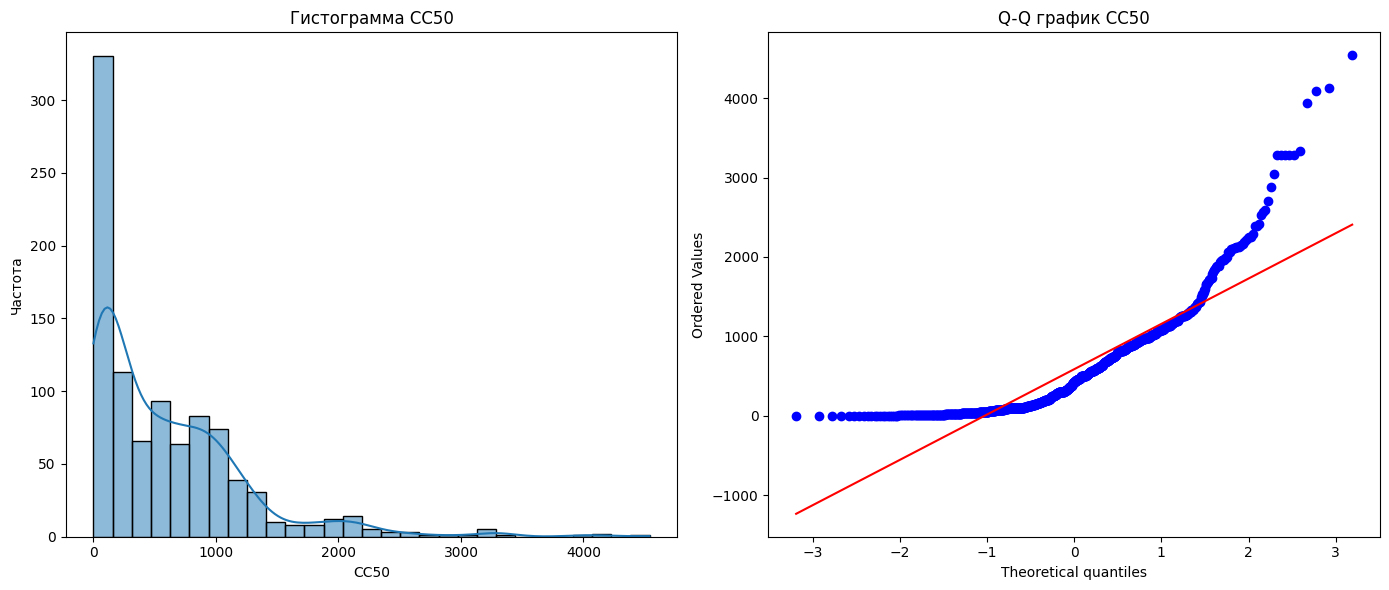

Тест Шапиро-Уилка для IC50: статистика=0.642, p-значение=0.000


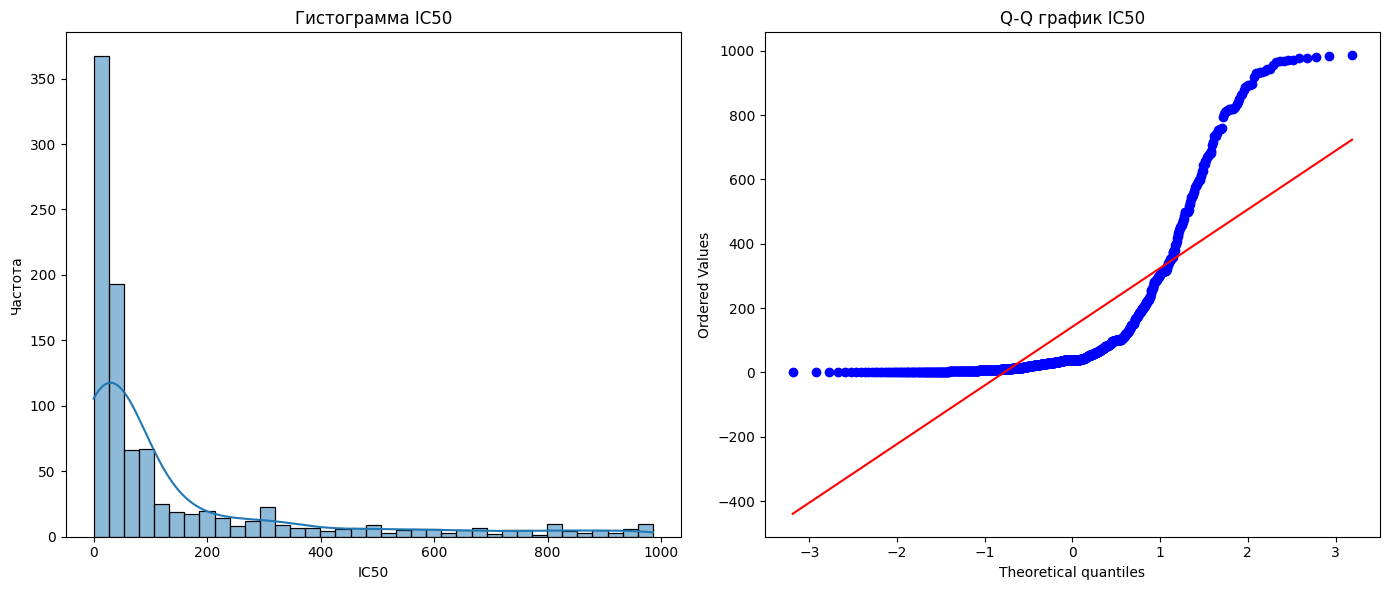

Тест Шапиро-Уилка для SI: статистика=0.330, p-значение=0.000


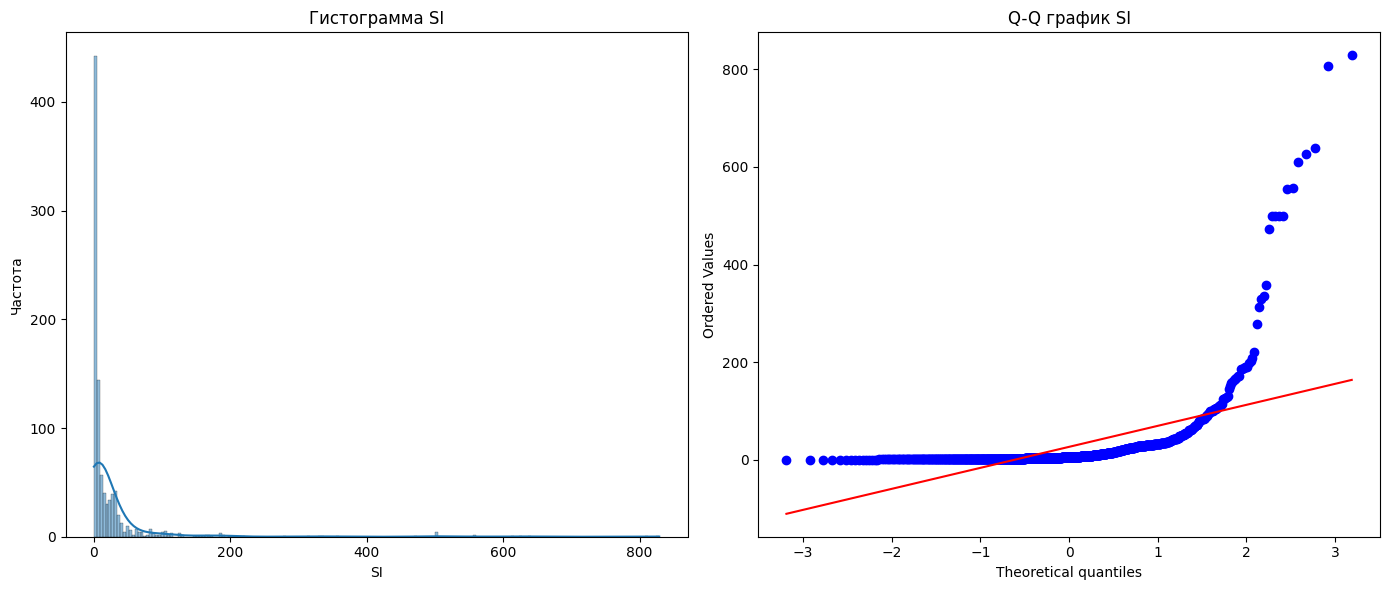


--- Тест Андерсона-Дарлина ---
Тест Андерсона-Дарлина для CC50: статистика=42.665
  Уровень значимости 15%: критическое значение 0.574
  Уровень значимости 30%: критическое значение 0.653
  Уровень значимости 45%: критическое значение 0.784
  Уровень значимости 60%: критическое значение 0.914
  Уровень значимости 75%: критическое значение 1.088


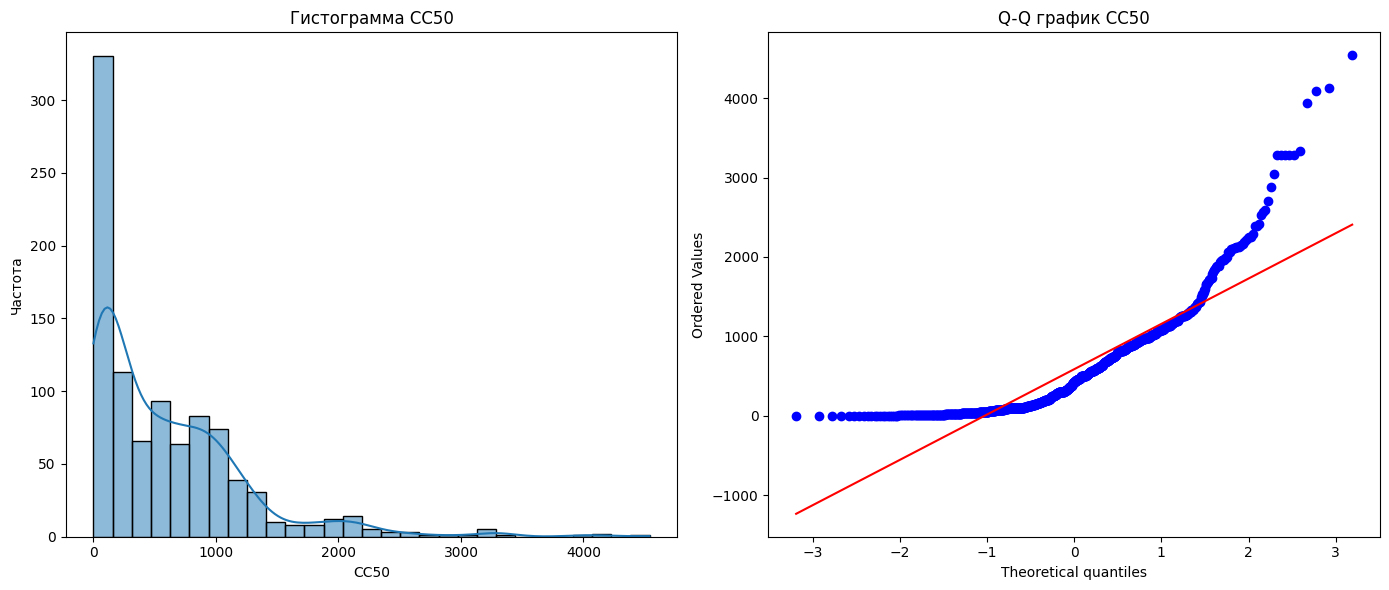

Тест Андерсона-Дарлина для IC50: статистика=134.582
  Уровень значимости 15%: критическое значение 0.574
  Уровень значимости 30%: критическое значение 0.653
  Уровень значимости 45%: критическое значение 0.784
  Уровень значимости 60%: критическое значение 0.914
  Уровень значимости 75%: критическое значение 1.088


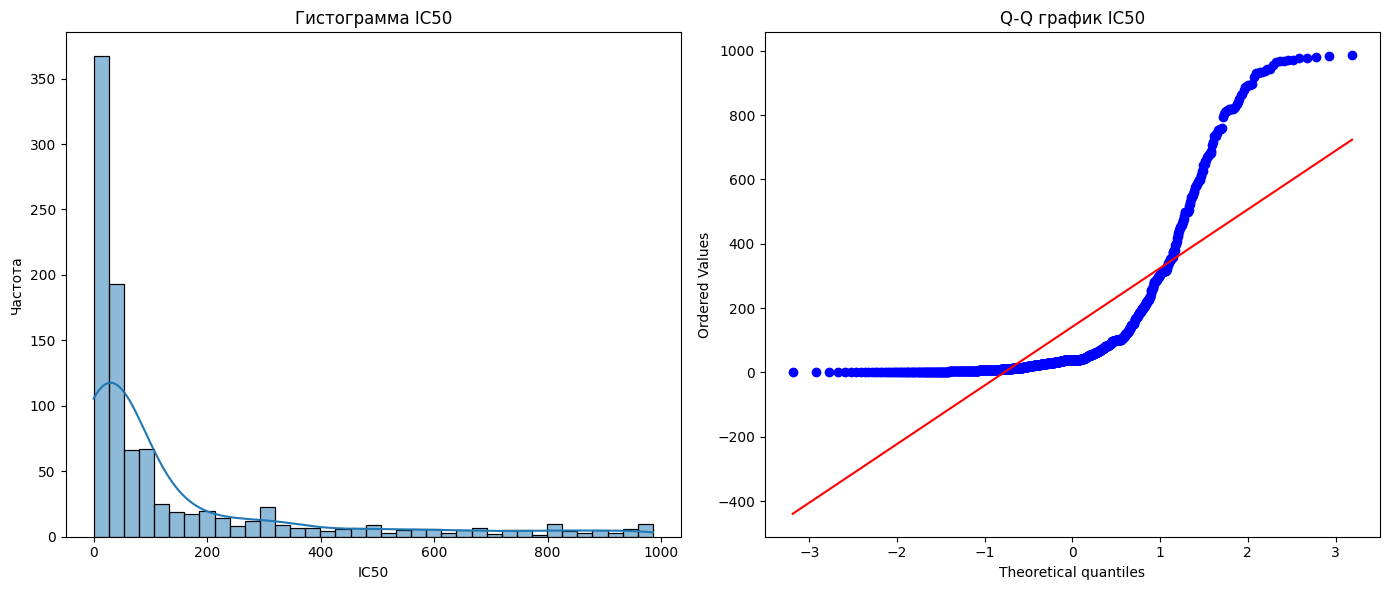

Тест Андерсона-Дарлина для SI: статистика=206.889
  Уровень значимости 15%: критическое значение 0.574
  Уровень значимости 30%: критическое значение 0.653
  Уровень значимости 45%: критическое значение 0.784
  Уровень значимости 60%: критическое значение 0.914
  Уровень значимости 75%: критическое значение 1.088


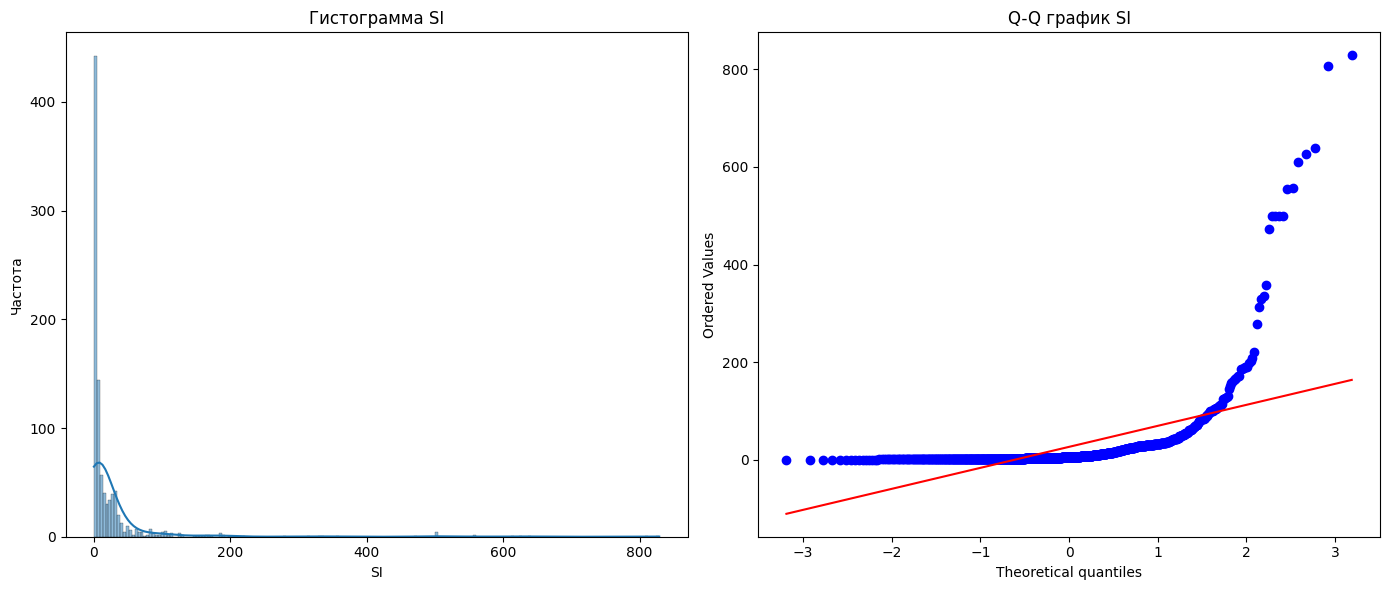

In [ ]:
# Список признаков для проверки нормальности распределения
columns_to_test = ['CC50', 'IC50', 'SI']

def shapiro_test(data, column):
    """
    Выполняет тест Шапиро-Уилка для проверки нормальности.
    Возвращает статистику и p-значение.
    """
    stat, p = stats.shapiro(data)
    return stat, p


def anderson_test(data, column):
    """
    Выполняет тест Андерсона-Дарлина.
    Возвращает статистику и критические значения на разных уровнях значимости.
    """
    result = stats.anderson(data)
    return result.statistic, result.critical_values


def plot_results(dataframe, column):
    """
    Строит гистограмму и Q-Q график для визуальной оценки нормальности распределения.
    """
    data = dataframe[column].dropna()

    plt.figure(figsize=(14, 6))

    # Гистограмма с KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data, kde=True)
    plt.title(f'Гистограмма {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')

    # Q-Q график
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q график {column}')

    plt.tight_layout()
    plt.show()


def perform_normality_tests(dataframe, columns):
    """
    Проводит тесты на нормальность (Шапиро-Уилк и Андерсон-Дарлин)
    для указанных столбцов и отображает графики.
    """
    for column in columns:
        data = dataframe[column].dropna()
        unique_values = dataframe[column].nunique()

        if len(data) < 3:
            print(f'{column}: Недостаточно данных (<3) для теста Шапиро-Уилка.')
        elif unique_values <= 1:
            print(f'{column}: Только одно уникальное значение, тест Шапиро-Уилка не применим.')
        else:
            try:
                stat, p = shapiro_test(data, column)
                print(f'Тест Шапиро-Уилка для {column}: статистика={stat:.3f}, p-значение={p:.3f}')
                plot_results(dataframe, column)
            except Exception as e:
                print(f'Ошибка при тестировании {column}: {e}')

    print("\n--- Тест Андерсона-Дарлина ---")
    for column in columns:
        data = dataframe[column].dropna()
        unique_values = dataframe[column].nunique()

        if len(data) < 8:
            print(f'{column}: Недостаточно данных (<8) для теста Андерсона-Дарлина.')
        elif unique_values <= 1:
            print(f'{column}: Только одно уникальное значение, тест Андерсона-Дарлина не применим.')
        else:
            stat, critical_values = anderson_test(data, column)
            print(f'Тест Андерсона-Дарлина для {column}: статистика={stat:.3f}')
            for sl, cv in zip(range(len(critical_values)), critical_values):
                sl_level = (sl + 1) * 15  # Уровень значимости
                print(f'  Уровень значимости {sl_level}%: критическое значение {cv:.3f}')
            plot_results(dataframe, column)


# Запуск всех тестов на нормальность для заданных признаков
perform_normality_tests(df, columns_to_test)

=== Тест Шапиро-Уилка ===

- Тест Шапиро-Уилка для CC50: статистика=0.809, p-значение=0.000
- Тест Шапиро-Уилка для IC50: статистика=0.642, p-значение=0.000
- Тест Шапиро-Уилка для SI: статистика=0.330, p-значение=0.000

--- Тест Андерсона-Дарлина ---

Тест Андерсона-Дарлина для CC50: статистика=42.665

  - Уровень значимости 15%: критическое значение 0.574
  - Уровень значимости 30%: критическое значение 0.653
  - Уровень значимости 45%: критическое значение 0.784
  - Уровень значимости 60%: критическое значение 0.914
  - Уровень значимости 75%: критическое значение 1.088

Тест Андерсона-Дарлина для IC50: статистика=134.582

  - Уровень значимости 15%: критическое значение 0.574
  - Уровень значимости 30%: критическое значение 0.653
  - Уровень значимости 45%: критическое значение 0.784
  - Уровень значимости 60%: критическое значение 0.914
  - Уровень значимости 75%: критическое значение 1.088

Тест Андерсона-Дарлина для SI: статистика=206.889

  - Уровень значимости 15%: критическое значение 0.574
  - Уровень значимости 30%: критическое значение 0.653
  - Уровень значимости 45%: критическое значение 0.784
  - Уровень значимости 60%: критическое значение 0.914
  - Уровень значимости 75%: критическое значение 1.088


  Вывод:

1. Тест Шапиро-Уилка
Все три признака (CC50, IC50, SI) не соответствуют нормальному распределению , так как:
Значения статистики значительно меньше 1.
Все p-значения < 0.05, что позволяет отвергнуть нулевую гипотезу о нормальности.

2. Тест Андерсона-Дарлина
CC50

Статистика: 42.665

Критические значения:

15% — 0.574

30% — 0.653

45% — 0.784

60% — 0.914

75% — 1.088

- Статистика больше всех критических значений, что подтверждает отсутствие нормальности.

IC50
Статистика: 134.582
Критические значения те же, что и выше.
-  Статистика значительно превышает все критические значения , что также указывает на отсутствие нормальности.

SI
Статистика: 206.889
- Аналогично предыдущим признакам, статистика намного больше всех критических значений , что подтверждает сильное отклонение от нормального распределения.

- Общий вывод
Ни один из исследуемых признаков (CC50, IC50, SI) не следует нормальному распределению ни по тесту Шапиро-Уилка, ни по тесту Андерсона-Дарлина.

In [ ]:
# Список признаков, которые будут удалены из датафрейма
remove_features = [
    'SMR_VSA2',    # Признак, связанный с поверхностной доступностью атомов (VSA)
    'SlogP_VSA7',  # Признак, описывающий гидрофобные свойства молекулы
    'EState_VSA11' # Признак, основанный на электрохимических состояниях атомов
]

# Удаление указанных признаков из датафрейма
df = df.drop(columns=remove_features)

# Проверка, какие признаки остались после удаления
print("Признаки:", df.columns.tolist())

Признаки: ['IC50', 'CC50', 'SI', 'MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt', 'ExactMolWt', 'NumValenceElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_

In [ ]:
# Проверим количество строк перед удалением строк с пропусками
print("Количество строк до удаления NaN:", df.shape[0])

Количество строк до удаления NaN: 969


In [ ]:
# Подсчитаем количество пропущенных (NaN) значений в каждом столбце
na_count = df.isnull().sum()

# Выведим столбцы, в которых есть пропущенные значения
print("Количество NaN значений по столбцам:")
print(na_count[na_count > 0])

Количество NaN значений по столбцам:
MaxPartialCharge       3
MinPartialCharge       3
MaxAbsPartialCharge    3
MinAbsPartialCharge    3
BCUT2D_MWHI            3
BCUT2D_MWLOW           3
BCUT2D_CHGHI           3
BCUT2D_CHGLO           3
BCUT2D_LOGPHI          3
BCUT2D_LOGPLOW         3
BCUT2D_MRHI            3
BCUT2D_MRLOW           3
dtype: int64


In [ ]:
# Заполняем пропущенные значения средними значениями
df.fillna(df.mean(), inplace=True)

# Вывод количества оставшихся пропущенных значений после заполнения
print("Количество пропущенных значений после заполнения:")
print(df.isnull().sum())

Количество пропущенных значений после заполнения:
IC50                 0
CC50                 0
SI                   0
MaxAbsEStateIndex    0
MaxEStateIndex       0
                    ..
fr_tetrazole         0
fr_thiazole          0
fr_thiophene         0
fr_unbrch_alkane     0
fr_urea              0
Length: 188, dtype: int64


In [ ]:
# Выведим первые строки обработанного датафрейма
df.head()

,IC50,CC50,SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,...,0,0,0,0,0,0,0,0,3,0
1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,...,0,0,0,0,0,0,0,0,3,0
2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,446.808,...,2,0,0,0,0,0,0,0,3,0
3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,398.679,...,0,0,0,0,0,0,0,0,4,0
4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,466.713,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Инициализация объекта StandardScaler для стандартизации данных
scaler = StandardScaler()

# Применение метода fit_transform() к датафрейму
df_standardscaler = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Вывод первых 5 строк преобразованного датафрейма
print(df_standardscaler.head())

       IC50      CC50        SI  MaxAbsEStateIndex  MaxEStateIndex  \
0 -0.599333 -0.648886  0.023693          -1.766931       -1.766931   
1 -0.623447 -0.917447 -0.258103          -2.112017       -2.112017   
2  0.360199 -0.671529 -0.341875          -2.518530       -2.518530   
3 -0.619328 -0.755671  0.492044          -1.765937       -1.765937   
4 -0.154375 -0.706065 -0.334138          -1.749744       -1.749744   

   MinAbsEStateIndex  MinEStateIndex       qed       SPS     MolWt  ...  \
0           1.230105        0.859969 -0.751719  1.076111  0.260487  ...   
1           2.098636        0.953566 -0.540135  1.257528  0.292155  ...   
2           2.154087        0.959542 -1.485466  1.017293  0.748665  ...   
3           1.250111        0.862125 -0.937063  0.991464  0.370656  ...   
4           0.538633        0.785453 -0.696952  0.567012  0.905000  ...   

   fr_quatN  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  \
0 -0.179370   -0.211946     -0.111979   -0.096825       

In [ ]:
# Проверим размерность датафрейма после масштабирования
print("Форма масштабированного датафрейма:", df_standardscaler.shape)

Форма масштабированного датафрейма: (969, 188)


In [ ]:
# Вывод масштабированного датафрейма после его стандартизации
df_standardscaler.head()

,IC50,CC50,SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,-0.599333,-0.648886,0.023693,-1.766931,-1.766931,1.230105,0.859969,-0.751719,1.076111,0.260487,...,-0.179370,-0.211946,-0.111979,-0.096825,-0.032141,-0.032141,-0.238132,-0.274721,2.268081,-0.085302
1,-0.623447,-0.917447,-0.258103,-2.112017,-2.112017,2.098636,0.953566,-0.540135,1.257528,0.292155,...,-0.179370,-0.211946,-0.111979,-0.096825,-0.032141,-0.032141,-0.238132,-0.274721,2.268081,-0.085302
2,0.360199,-0.671529,-0.341875,-2.518530,-2.518530,2.154087,0.959542,-1.485466,1.017293,0.748665,...,6.379466,-0.211946,-0.111979,-0.096825,-0.032141,-0.032141,-0.238132,-0.274721,2.268081,-0.085302
3,-0.619328,-0.755671,0.492044,-1.765937,-1.765937,1.250111,0.862125,-0.937063,0.991464,0.370656,...,-0.179370,-0.211946,-0.111979,-0.096825,-0.032141,-0.032141,-0.238132,-0.274721,3.080565,-0.085302
4,-0.154375,-0.706065,-0.334138,-1.749744,-1.749744,0.538633,0.785453,-0.696952,0.567012,0.905000,...,-0.179370,-0.211946,-0.111979,-0.096825,-0.032141,-0.032141,-0.238132,-0.274721,-0.169372,-0.085302


In [ ]:
# Сохраняем масштабированный датафрейм в CSV-файл с именем 'df_standardscaler.csv'
df_standardscaler.to_csv('/content/drive/MyDrive/Colab Notebooks/Classic_ML_Vo_PJ/df_standardscaler.csv', index=False)